# CDS-1011: Einführung Data Science
## Lineare Regression

Ziel dieser Aufgabe ist es, anhand der Flossengrösse (in mm) das Gewicht (in g) des Pinguins zu bestimmen. Dafür verwenden wir den Palmer Penguins Datensatz.

Die lineare Regression bedient sich einer abhängigen, in dieser Aufgabe die Flossengrösse, und einer unabhängigen Variable (das Gewicht). Besonders zuverlässige Ergebnisse können erzielt werden, wenn zwischen der abhängigen und unabhängigen Variable eine starke lineare (daher der Name) Korrelation besteht.

Diese Aufgabe ist grob in 7 Teilaufgaben unterteilt:
1. Daten laden, betrachten und verstehen
2. Data Quality Assessment durchführen
3. Lineare Regression von "Hand" mithilfe der mathematischen Formeln durchführen
4. Zuverlässigkeit/Genauigkeit der Formel prüfen
5. Lineare Regression mit SciKit durchführen
6. Zuverlässigkeit/Genauigkeit des Modells prüfen
7. Zusätzliche Aufgaben / Theorie

Sie werden mit diesem Juptyter Notebook durch diese Schritte begleitet. Teilweise fehlen Code-Teile, die Sie im Rahmen dieser Aufgabe erarbeiten sollen. Zusätzlich gibt es Theoriefragen, bezogen auf die Aufgabe, die Ihnen helfen soll das Erarbeitete zu verstehen und hinterfagen.

#### Versionen überprüfen

Als erstes stellen wir sicher, dass alle benötigten Pakete sowie die richtige Python Version vorhanden sind

In [74]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### <span style="color:blue">Aufgabe 1.1 - Datensatz laden, filtern und verstehen </span>  

Wie bereits erwähnt verwenden wir für diese Aufgabe den Palmer Penguin Datensatz. Wir benötigen jedoch nur die Spalten `Flipper Length (mm)	` (abhängige Variable) und `Body Mass (g)` (unabhängige Variable).

Laden Sie den Datensatz "penguins.csv" `penguins`, jedoch lediglich mit den oben erwähnten zwei Spalten.

In [75]:
penguins = pd.read_csv("../dataset/Testdata.csv")

height = penguins[["Height"]].values
weight = penguins[["Weight"]].values

for index in range(len(height)):
    height[index] = height[index] * 2.54
    weight[index] = weight[index] * 0.454

penguins[["Height"]] = height
penguins[["Weight"]] = weight
penguins


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
0,1.0708,23,70.0295,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,78.6555,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,69.9160,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,83.8765,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,83.6495,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1.0736,70,60.9495,170.180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
241,1.0236,72,91.2540,177.165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
242,1.0328,72,84.7845,167.640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
243,1.0399,72,86.6005,179.070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


Wir verschaffen uns einen Überblick wie die Daten nun aussehen. 

In [76]:
penguins.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.00000,245.000000,245.000000,245.000000
mean,1.055513,44.942857,80.980258,178.621612,37.966122,100.737551,92.408571,99.706939,59.321633,38.555102,22.998776,32.25102,28.729388,18.224490,19.156735
std,0.018478,12.643148,12.095204,6.614227,2.270759,8.042432,10.086769,6.332481,4.813648,2.289092,1.337495,2.89197,1.961691,0.904753,8.168136
min,0.995000,22.000000,56.750000,162.560000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,25.30000,22.000000,15.800000,3.000000
25%,1.041800,36.000000,72.299500,173.990000,36.400000,94.400000,84.600000,95.500000,56.100000,37.000000,22.000000,30.20000,27.300000,17.600000,12.500000
50%,1.054900,43.000000,80.017500,177.800000,38.000000,99.600000,91.000000,99.300000,59.000000,38.500000,22.800000,32.00000,28.800000,18.300000,19.200000
75%,1.070300,54.000000,89.324500,183.515000,39.400000,105.300000,99.200000,103.200000,62.300000,39.900000,24.000000,34.30000,30.000000,18.800000,25.200000
max,1.099100,81.000000,119.288500,197.485000,43.900000,128.300000,126.200000,125.600000,74.400000,46.000000,27.000000,39.10000,34.900000,21.400000,47.500000


In [77]:
penguins.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
0,1.0708,23,70.0295,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,78.6555,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,69.9160,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,83.8765,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,83.6495,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


In [78]:
penguins.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  5 non-null      float64
 1   Age      5 non-null      int64  
 2   Weight   5 non-null      float64
 3   Height   5 non-null      float64
 4   Neck     5 non-null      float64
 5   Chest    5 non-null      float64
 6   Abdomen  5 non-null      float64
 7   Hip      5 non-null      float64
 8   Thigh    5 non-null      float64
 9   Knee     5 non-null      float64
 10  Ankle    5 non-null      float64
 11  Biceps   5 non-null      float64
 12  Forearm  5 non-null      float64
 13  Wrist    5 non-null      float64
 14  class    5 non-null      float64
dtypes: float64(14), int64(1)
memory usage: 728.0 bytes


#### <span style="color:blue">Aufgabe 1.2 - Data Quality Assessment</span>  

Bevor wir mit dem Datensatz arbeiten sollten wir sicherstellen, dass diese qualitativ in Ordnung sind.

Überprüfen Sie:
- Anzahl der Datenpunkte (Können wir mit dieser Anzahl aussagekräftige Berechnungen durchführen?)
- Min, max, mean ... (Gibt es unrealistische Daten? z.B. Ein Pinguin mit einem negativen Gewicht, oder einer der über 1000 kg wiegt? Tipp: Siehe Output oben von `penguins.describe()`)
- Wieviele Einträge Null sind

In [79]:
# Check amount of rows
row_count = len(penguins)
print("Number of rows:", row_count)

# check min, max, mean ...
# See penguins.describe() above

# Check for null-values
penguins.isnull().sum()

Number of rows: 245


Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
class      0
dtype: int64

Es gibt verschiedene Möglichkeiten mit Null-Values umzugehen. Wählen Sie eine passende und "reparieren" Sie den Datensatz.

In [80]:
# drop rows with null-values
#penguins.dropna(inplace=True)

# fill null-values with mean
penguins.fillna(penguins.mean(), inplace=True)

#### <span style="color:blue">Aufgabe 1.3 - Lineare Regression von "Hand"</span>  

Unser DataFrame enthält nurnoch die zwei Spalten "Flipper Length (mm)" und "Body Mass (g)". Extrahieren Sie die Werte für die Features (abhängige Variable) und Targets (unabhängige Variable) in X respektive Y

In [85]:
feature_name = "class"
target_name = "Wrist"

# extract feature values from dataframe
X = penguins[[feature_name]].values

# extract target values from dataframe
Y = penguins[target_name].values


Nun visualisieren wir die Daten als Scatter-Plot.

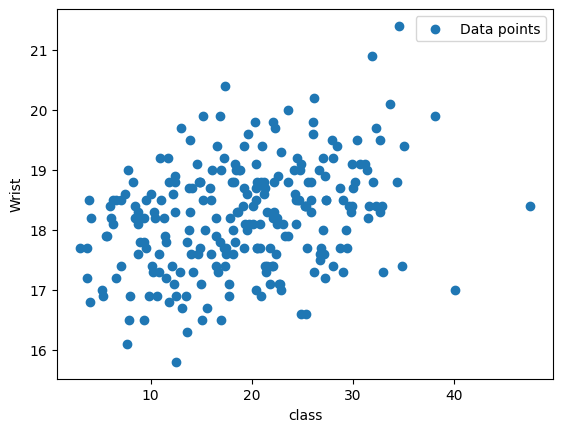

In [86]:
plt.scatter(X, Y, label='Data points')

plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.legend()
plt.show()

Im Scatter-Plot kann man die starke lineare Korrelation zwischen Flipper Length und Body Mass sehen.

Ziel der linearen Regression ist, eine lineare Gleichung zu finden die alle Datenpunkte mit dem kleinstmöglichsten Fehler beschreiben.

<p align="center">
  <img src="img/Aufgabe_1_Lineare_Gleichung.png"/>
</p>
<center>Formel der linearen Gleichung</center>



Als erstes berechnen wir die Steigung m. Die verwendete Gleichung ist:

<p align="center">
  <img src="img/Aufgabe_1_Steigung_Formel.png"/>
</p>
<center>Formel für die Steigung m</center>






In [63]:
# calculate mean value of X
mean_x = np.mean(X)

# calculate mean value of Y
mean_y = np.mean(Y)

# calculate m
# hint: It's easier to first calculate the numer (Zähler) and the denom (Nenner) before dividing.
# hint: Use a for-loop
numer = 0
denom = 0
for i in range(len(X)):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
m = numer / denom  


# calculate c
# hint use mean_y and mean_x together with m
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = [0.08574864] 
c = [27.05316225]


Da wir nun alle Parameter der linearer Gleichung haben, können wir diese im vorherigen Scatter-Plot einzeichnen. 

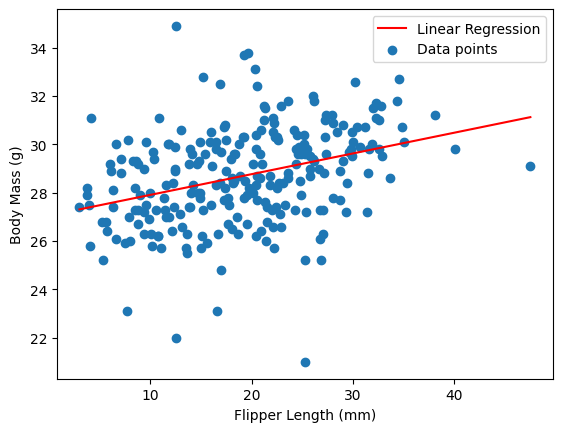

In [64]:
# get min value for X
min_x = np.min(X)

# get max value for X
max_x = np.max(X)

# calculating line values x and y
x = np.linspace(min_x, max_x, 100)

# lineare Gleichung einfügen um y zu berechnen
y = c + m * x

plt.plot(x, y, 'r', label='Linear Regression')
plt.scatter(X, Y, label='Data points')

plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()

#### <span style="color:blue">Aufgabe 1.4 - Genauigkeit/Zuverlässigkeit der Formel prüfen</span>  

Um zu überprüfen, wie nahe die Daten an der angepassten Regressionslinie liegen, kann die R2 Score berechnet werden.


<p align="center">
  <img src="img/Aufgabe_1_R2_Formel.png"/>
</p>

<center>Formel für den R2 Wert</center>



In [65]:
# calculating R2 value for measuring goodness of our model


# total sum of squares
ss_t = 0
# total sum of square of residuals
ss_r = 0

for i in range(len(X)):
    y_pred = c + m * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print("Your R2 score is: ", r2)

Your R2 score is:  [0.12015924]


#### <span style="color:blue">Aufgabe 1.5 - Lineare Regression mit SciKit</span>  

Nun führen wir die lineare Regression erneut durch, diesmal aber mithilfe von SciKit. Wie Sie sehen werden ist dies deutlich einfacher. Zuerst erstellen wir jedoch ein Train und Test Set um das Modell anschliessen auf ungesehenen Daten zu testen.

In [66]:
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"

# extract data and target columns
X, Y = penguins[[feature_name]], penguins[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

KeyError: "None of [Index(['Flipper Length (mm)'], dtype='object')] are in the [columns]"

In [ ]:
# load linear regression model from sklearn.linear_model
model = LinearRegression()

# fit model with train data
model.fit(X_train, y_train)

# predict y values for unseen test data X_test
y_pred = model.predict(X_test)

# print df with actual and predicted data
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted

,Actual,Predicted
141,3475.0,3517.527722
6,3625.0,3224.311307
60,3150.0,3419.788917
249,5550.0,5130.218001
54,2900.0,3517.527722
...,...,...
229,5150.0,4885.870989
298,4750.0,4885.870989
21,3600.0,3175.441905
246,4100.0,4934.740391


#### <span style="color:blue">Aufgabe 1.6 - Genauigkeit/Zuverlässigkeit des Modells prüfen</span>  

Nebst der R2 Score wollen wir nun noch andere Metriken betrachten:
- R2 Score
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)

Auch hier ist das Berechnen dieser Metriken wesentlich einfacher.

In [ ]:
# hint: check imports

mean_absolute_error = mean_absolute_error(y_test, y_pred)

mean_squared_error = mean_squared_error(y_test, y_pred)

root_mean_squared_error = np.sqrt(mean_squared_error)

r2 = r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error):', mean_absolute_error)
print('MSE (Mean Squared Error):', mean_squared_error)
print('RMSE (Root Mean Squared Error):', root_mean_squared_error)
print("R2 Score:", r2)

MAE (Mean Absolute Error): 341.08671040315613
MSE (Mean Squared Error): 178645.61179626445
RMSE (Root Mean Squared Error): 422.6648930255084
R2 Score: 0.7474164773005858


#### <span style="color:blue">Aufgabe 1.7 - Zusatzaufgaben</span>  
Mit SciKit's LinearRegression erhalten wir eine tiefere R2 Score als vorhin mit der manuellen Berechnung. Überlegen Sie sich, warum diese unterschiedlich sind und begründen Sie.

<span style="color:green">Bei der manuellen Berechnung haben wir den kompletten Datensatz miteinbezogen, während bei der Variante mit der `LinearRegression` ein Train/Test Split von 80/20 gemacht wurde. Letztere R2 Score bezieht sich lediglich auf die unseen 20% Testdaten. Bei der manuellen über den gesamten Datensatz.</span>

#### <span style="color:blue">Aufgabe 1.8 - Zusatzaufgaben</span>  
Implementieren Sie eine Grid Search Hyperparameter Suche mit dem Gradient Boosting Regressor.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

params = dict()
params['n_estimators'] = [10, 50, 100, 200]
params['learning_rate'] = [0.01, 0.02, 0.03, 0.04, 0.05]
params['subsample'] = [0.5, 0.7, 1.0]
params['max_depth'] = [3, 7, 9]

model = GradientBoostingRegressor(random_state=42)
grid = GridSearchCV(model, params, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Best estimator across ALL searched params:\n",grid.best_estimator_)
print("Best score across ALL searched params:\n",grid.best_score_)
print("Best parameters across ALL searched params:\n",grid.best_params_)

Best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, random_state=42, subsample=0.5)
Best score across ALL searched params:
 0.7586809752842124
Best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
